In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Mexico_Limpio.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 26582 non-null  int64  
 1   Unnamed: 0                   26582 non-null  int64  
 2   listing_url                  26582 non-null  object 
 3   last_scraped                 26582 non-null  object 
 4   source                       26582 non-null  object 
 5   name                         26582 non-null  object 
 6   neighborhood_overview        26582 non-null  object 
 7   picture_url                  26582 non-null  object 
 8   host_url                     26582 non-null  object 
 9   host_name                    26582 non-null  object 
 10  host_since                   26582 non-null  object 
 11  host_location                26582 non-null  object 
 12  host_about                   26582 non-null  object 
 13  host_response_ti

In [4]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=True).astype(float) / 100

In [5]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=True).astype(float) / 100

In [6]:
df['host_is_superhost'] = df['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_11988\2304674514.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['host_is_superhost'] = df['host_is_superhost'].replace({'f': 0, 't': 1})


In [7]:
df['instant_bookable'] = df['instant_bookable'].replace({'f': 0, 't': 1})
df['has_availability'] = df['has_availability'].replace({'f': 0, 't': 1})
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'f': 0, 't': 1})
df['host_identity_verified'] = df['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_11988\2094007536.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['instant_bookable'] = df['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_11988\2094007536.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_11988\2094007536.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future 

In [8]:
df['host_verifications'] = df['host_verifications'].map({"['email', 'phone', 'work_email']":1, "['email', 'phone']":2, "['phone']": 3,"['phone', 'work_email']": 4, "['email']": 5,"[]": 6,"['email', 'work_email']": 7,"['work_email']": 8})


In [9]:
df['host_response_time'] = df['host_response_time'].map({'a few days or more':1, 'within an hour':2,'within a few hours':3, 'within a day':4})

In [10]:
df['room_type'] = df['room_type'].replace({
    'Entire home/apt': 1,
    'Private room': 2,
    'Hotel room': 3,
    'Shared room': 4
}).astype(int)

C:\Users\blanf\AppData\Local\Temp\ipykernel_11988\4088692459.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['room_type'] = df['room_type'].replace({


In [11]:
df['amenities_size'] = df['amenities'].apply(len).astype(int)


In [12]:
df1 = df.select_dtypes(include=['float64', 'int64'])

In [13]:
Corr_Factors=df1.corr()
Corr_Factors

,Unnamed: 0.1,Unnamed: 0,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,room_type,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
Unnamed: 0.1,1.000000,1.000000,-0.038585,0.164290,0.161247,-0.011580,0.092777,-0.116110,0.106363,-0.037654,...,-0.154793,-0.262576,0.115756,-0.333199,0.077491,0.124989,0.065414,0.065238,0.180301,-0.036765
Unnamed: 0,1.000000,1.000000,-0.038585,0.164290,0.161247,-0.011580,0.092777,-0.116110,0.106363,-0.037654,...,-0.154793,-0.262576,0.115756,-0.333199,0.077491,0.124989,0.065414,0.065238,0.180301,-0.036765
host_response_time,-0.038585,-0.038585,1.000000,0.264055,0.120722,0.026765,-0.017093,0.019244,-0.017038,-0.034010,...,0.060045,0.000193,-0.045758,0.028466,0.029684,-0.005430,-0.007033,0.001023,-0.032411,0.027389
host_response_rate,0.164290,0.164290,0.264055,1.000000,0.773978,0.357524,-0.127342,0.074821,0.300119,-0.164173,...,-0.029364,0.013458,0.213420,0.241008,-0.012917,-0.087996,-0.047605,-0.043493,0.201953,0.295463
host_acceptance_rate,0.161247,0.161247,0.120722,0.773978,1.000000,0.382265,-0.119846,0.084928,0.319266,-0.179862,...,-0.035730,0.025418,0.181961,0.273783,-0.017445,-0.105783,-0.063625,-0.046082,0.208976,0.321435
host_is_superhost,-0.011580,-0.011580,0.026765,0.357524,0.382265,1.000000,-0.108013,0.069848,0.136710,-0.166572,...,0.052102,0.002433,0.034349,0.291160,0.194144,0.072960,0.111221,0.000747,0.227751,0.341449
host_verifications,0.092777,0.092777,-0.017093,-0.127342,-0.119846,-0.108013,1.000000,-0.145326,-0.090987,0.061411,...,-0.043988,-0.041864,-0.023303,-0.084983,-0.019511,0.020947,-0.008572,0.009323,-0.019940,-0.129801
host_has_profile_pic,-0.116110,-0.116110,0.019244,0.074821,0.084928,0.069848,-0.145326,1.000000,0.022172,-0.011688,...,0.039586,0.049922,-0.009057,0.076888,0.005175,-0.022190,-0.005340,-0.001619,-0.006426,0.090432
host_identity_verified,0.106363,0.106363,-0.017038,0.300119,0.319266,0.136710,-0.090987,0.022172,1.000000,-0.147594,...,0.018392,-0.008338,0.241240,0.113924,0.004422,-0.056573,-0.002526,-0.005775,0.037777,0.149136
room_type,-0.037654,-0.037654,-0.034010,-0.164173,-0.179862,-0.166572,0.061411,-0.011688,-0.147594,1.000000,...,-0.160087,-0.064583,0.015528,-0.177828,0.007930,0.034111,0.006302,0.040439,-0.173118,-0.265072


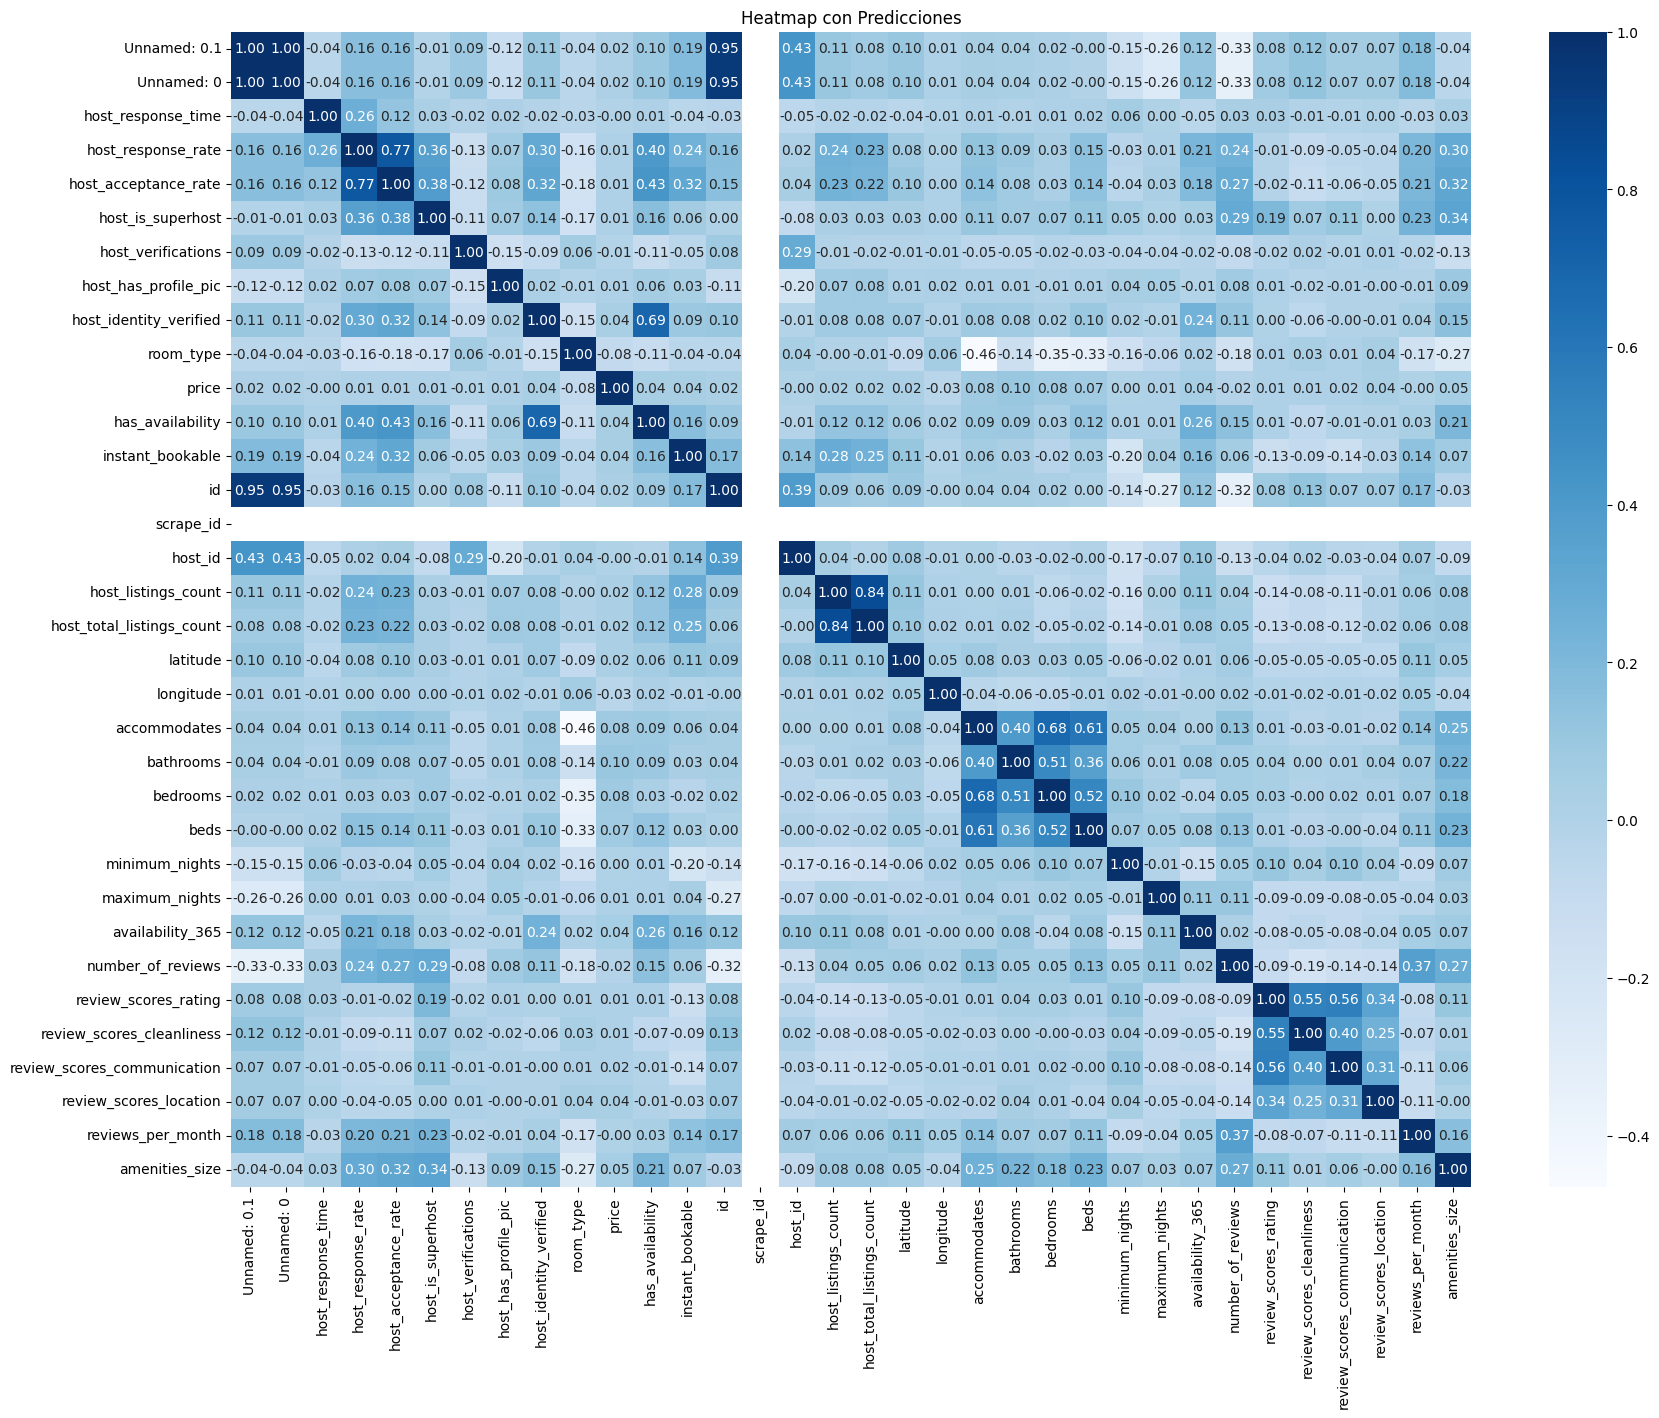

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(Corr_Factors, cmap='Blues', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()

**HOST_ID**

<Axes: xlabel='host_verifications', ylabel='host_id'>

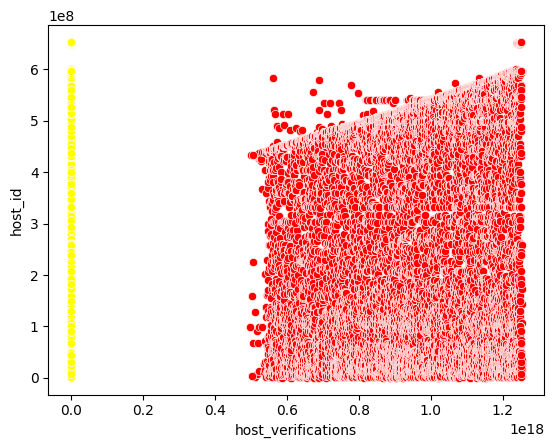

In [15]:
from turtle import color


sns.scatterplot(x='host_verifications', y='host_id', color="blue", data=df1)
sns.scatterplot(x='id', y='host_id', color="red", data=df1)
sns.scatterplot(x='instant_bookable', y='host_id', color="yellow", data=df1)

In [16]:

Vars_Indep= df1[['host_verifications', 'id','instant_bookable']]
Var_Dep= df1['host_id']

In [17]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [18]:
type(model)

sklearn.linear_model._base.LinearRegression

In [19]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [20]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_verifications', 'id', 'instant_bookable'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.94499378e-27,  1.47347567e-10, -8.29763256e-29]),
 'rank_': 1,
 'singular_': array([7.97114737e+19, 8.51973075e+01, 7.75909021e+01]),
 'intercept_': np.float64(137886790.64169878)}

In [21]:
model.score(Vars_Indep,Var_Dep)

0.15358108143287597

In [22]:
y_pred= model.predict(X=df1[['host_verifications', 'id','instant_bookable']])
y_pred

array([1.37886791e+08, 1.37886791e+08, 1.37886791e+08, ...,
       3.22393291e+08, 3.22398118e+08, 3.22399711e+08], shape=(26582,))

In [23]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,Unnamed: 0.1,Unnamed: 0,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
0,1.378868e+08,0,0,1.0,0.00,0.009,0,1,1,1,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,182
1,1.378868e+08,1,1,2.0,1.00,0.930,1,1,1,1,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,439
2,1.378868e+08,2,2,2.0,0.71,0.570,1,2,1,1,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,373
3,1.378868e+08,3,3,3.0,1.00,1.000,1,1,1,1,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,939
4,1.378868e+08,4,4,2.0,1.00,1.000,1,2,1,1,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,3.223868e+08,26577,26577,2.0,1.00,1.000,1,2,1,1,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,488
26578,3.223895e+08,26578,26578,2.0,1.00,1.000,0,2,1,1,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,701
26579,3.223933e+08,26579,26579,2.0,1.00,1.000,0,2,1,1,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,703
26580,3.223981e+08,26580,26580,2.0,1.00,1.000,0,2,1,1,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,718


<Axes: xlabel='id', ylabel='host_id'>

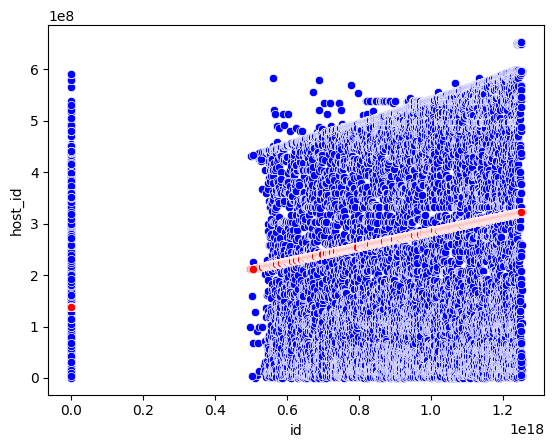

In [24]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='id', y='host_id', color="blue", data=df1)
sns.scatterplot(x='id', y='Predicciones', color="red", data=df1)

#sns.scatterplot(x='host_verifications', y='host_id', color="blue", data=df1)
#sns.scatterplot(x='host_verifications', y='Predicciones', color="red", data=df1)

#sns.scatterplot(x='instant_bookable', y='host_id', color="blue", data=df1)
#sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=df1)

In [25]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.15358108143287597

In [26]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.391894222249928)

**HOST_ACCEPTANCE_RATE**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

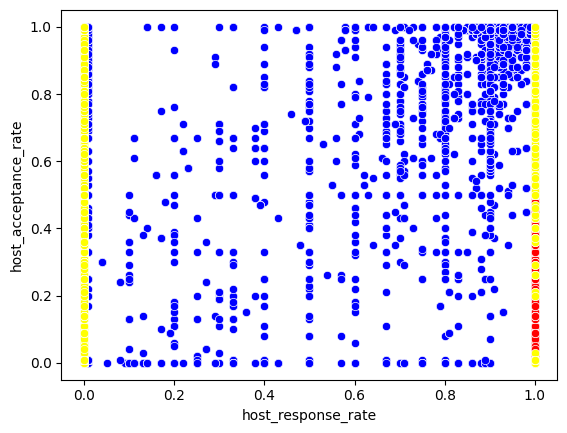

In [27]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df1)
sns.scatterplot(x='has_availability', y='host_acceptance_rate', color="red", data=df1)
sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="yellow", data=df1)

In [28]:
Vars_Indep2= df1[['host_response_rate', 'has_availability','host_is_superhost']]
Var_Dep2= df1['host_acceptance_rate']

In [29]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [30]:
type(model2)

sklearn.linear_model._base.LinearRegression

In [31]:
model2.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [32]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'has_availability', 'host_is_superhost'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.64863362, 0.24838578, 0.08577728]),
 'rank_': 3,
 'singular_': array([85.02479942, 54.03830119, 28.27806009]),
 'intercept_': np.float64(0.0019959118614996108)}

In [33]:
model2.score(Vars_Indep2,Var_Dep2)

0.6275194513058897

In [34]:
y_pred2= model2.predict(X=df1[['host_response_rate', 'has_availability','host_is_superhost']])
y_pred2

array([0.25038169, 0.98479259, 0.79668884, ..., 0.89901531, 0.89901531,
       0.98479259], shape=(26582,))

In [35]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones2', y_pred2)
df1

,Predicciones2,Predicciones,Unnamed: 0.1,Unnamed: 0,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
0,0.250382,1.378868e+08,0,0,1.0,0.00,0.009,0,1,1,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,182
1,0.984793,1.378868e+08,1,1,2.0,1.00,0.930,1,1,1,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,439
2,0.796689,1.378868e+08,2,2,2.0,0.71,0.570,1,2,1,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,373
3,0.984793,1.378868e+08,3,3,3.0,1.00,1.000,1,1,1,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,939
4,0.984793,1.378868e+08,4,4,2.0,1.00,1.000,1,2,1,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,0.984793,3.223868e+08,26577,26577,2.0,1.00,1.000,1,2,1,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,488
26578,0.899015,3.223895e+08,26578,26578,2.0,1.00,1.000,0,2,1,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,701
26579,0.899015,3.223933e+08,26579,26579,2.0,1.00,1.000,0,2,1,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,703
26580,0.899015,3.223981e+08,26580,26580,2.0,1.00,1.000,0,2,1,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,718


In [36]:
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.6275194513058897

In [37]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.7921612533480098)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

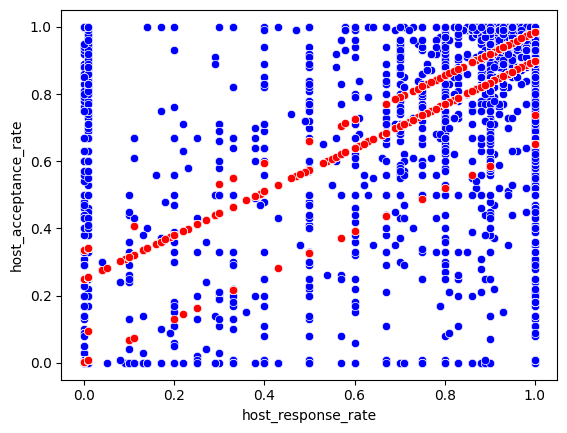

In [38]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df1)
sns.scatterplot(x='host_response_rate', y='Predicciones2', color="red", data=df1)

**HOST_IS_SUPERHOST**

<Axes: xlabel='host_response_rate', ylabel='host_is_superhost'>

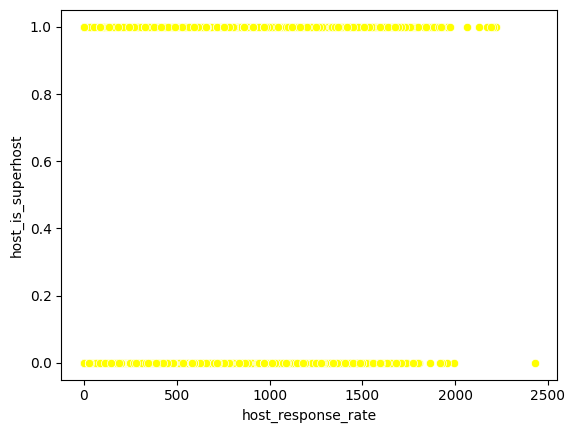

In [39]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_is_superhost', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y='host_is_superhost', color="red", data=df1)
sns.scatterplot(x='amenities_size', y='host_is_superhost', color="yellow", data=df1)

In [40]:
Vars_Indep3= df1[['host_response_rate', 'host_acceptance_rate','amenities_size']]
Var_Dep3= df1['host_is_superhost']

In [41]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [42]:
type(model3)

sklearn.linear_model._base.LinearRegression

In [43]:
model3.fit(X=Vars_Indep3, y=Var_Dep3)

LinearRegression()

In [44]:
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'host_acceptance_rate', 'amenities_size'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.16673844, 0.2874027 , 0.00034492]),
 'rank_': 3,
 'singular_': array([5.46769985e+04, 7.41764545e+01, 2.79500726e+01]),
 'intercept_': np.float64(-0.17823281009862463)}

In [45]:
model3.score(Vars_Indep3,Var_Dep3)

0.20575073826212875

In [46]:
y_pred3= model3.predict(X=df1[['host_response_rate', 'host_acceptance_rate','amenities_size']])
y_pred3

array([-0.11287027,  0.40721116,  0.23262715, ...,  0.51838892,
        0.52356276,  0.32247288], shape=(26582,))

In [47]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones3', y_pred3)
df1

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0.1,Unnamed: 0,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
0,-0.112870,0.250382,1.378868e+08,0,0,1.0,0.00,0.009,0,1,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,182
1,0.407211,0.984793,1.378868e+08,1,1,2.0,1.00,0.930,1,1,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,439
2,0.232627,0.796689,1.378868e+08,2,2,2.0,0.71,0.570,1,2,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,373
3,0.599791,0.984793,1.378868e+08,3,3,3.0,1.00,1.000,1,1,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,939
4,0.500798,0.984793,1.378868e+08,4,4,2.0,1.00,1.000,1,2,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,0.444231,0.984793,3.223868e+08,26577,26577,2.0,1.00,1.000,1,2,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,488
26578,0.517699,0.899015,3.223895e+08,26578,26578,2.0,1.00,1.000,0,2,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,701
26579,0.518389,0.899015,3.223933e+08,26579,26579,2.0,1.00,1.000,0,2,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,703
26580,0.523563,0.899015,3.223981e+08,26580,26580,2.0,1.00,1.000,0,2,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,718


In [48]:
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.20575073826212875

In [49]:
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.4535975509877988)

<Axes: xlabel='host_acceptance_rate', ylabel='host_is_superhost'>

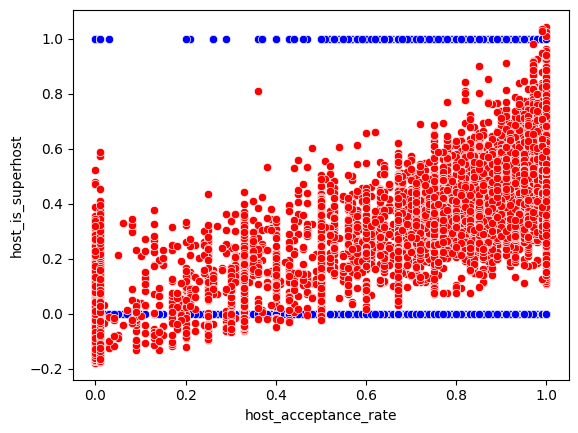

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_is_superhost', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="red", data=df1)


**host_total_listings_count**

<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

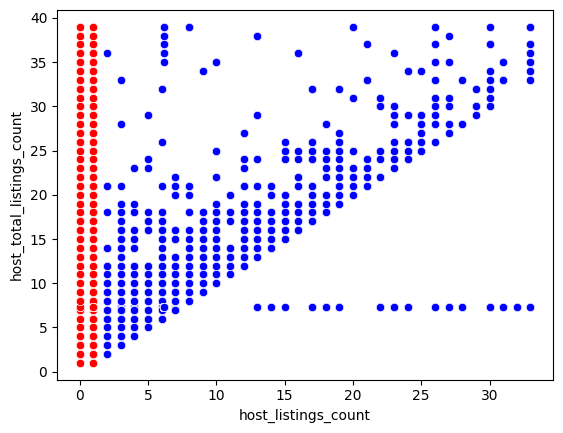

In [51]:
from turtle import color
sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y='host_total_listings_count', color="red", data=df1)


In [52]:
Vars_Indep4= df1[['host_listings_count','instant_bookable']]
Var_Dep4= df1['host_total_listings_count']


In [53]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()


In [54]:
type(model3)

sklearn.linear_model._base.LinearRegression

In [55]:
model4.fit(X=Vars_Indep4, y=Var_Dep4)

LinearRegression()

In [56]:
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'instant_bookable'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.96244805, 0.21683222]),
 'rank_': 2,
 'singular_': array([1097.96534394,   76.46062381]),
 'intercept_': np.float64(1.2997567704466828)}

In [57]:
model4.score(Vars_Indep4,Var_Dep4)

0.7106854303567822

In [58]:
y_pred4= model4.predict(X=df1[['host_listings_count','instant_bookable']])
y_pred4


array([ 2.26220482, 12.84913341,  4.18710093, ..., 16.91575785,
       16.91575785,  5.36638121], shape=(26582,))

In [59]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones4', y_pred4)
df1


,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0.1,Unnamed: 0,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
0,2.262205,-0.112870,0.250382,1.378868e+08,0,0,1.0,0.00,0.009,0,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,182
1,12.849133,0.407211,0.984793,1.378868e+08,1,1,2.0,1.00,0.930,1,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,439
2,4.187101,0.232627,0.796689,1.378868e+08,2,2,2.0,0.71,0.570,1,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,373
3,4.187101,0.599791,0.984793,1.378868e+08,3,3,3.0,1.00,1.000,1,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,939
4,6.111997,0.500798,0.984793,1.378868e+08,4,4,2.0,1.00,1.000,1,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,7.483767,0.444231,0.984793,3.223868e+08,26577,26577,2.0,1.00,1.000,1,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,488
26578,16.915758,0.517699,0.899015,3.223895e+08,26578,26578,2.0,1.00,1.000,0,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,701
26579,16.915758,0.518389,0.899015,3.223933e+08,26579,26579,2.0,1.00,1.000,0,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,703
26580,16.915758,0.523563,0.899015,3.223981e+08,26580,26580,2.0,1.00,1.000,0,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,718


In [60]:
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4


0.7106854303567822

In [61]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.8430216072893875)

<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

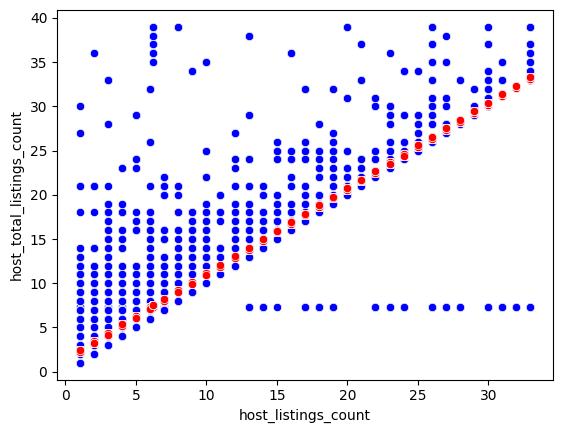

In [62]:
sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color="blue", data=df1)
sns.scatterplot(x='host_listings_count', y='Predicciones4', color="red", data=df1)



**ROOM_TYPE**

<Axes: xlabel='accommodates', ylabel='room_type'>

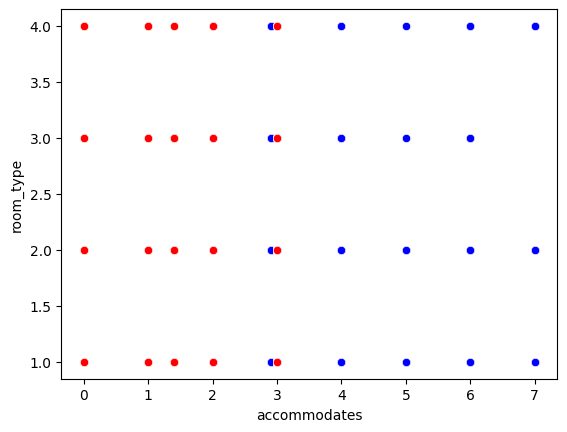

In [63]:
from turtle import color
sns.scatterplot(x='accommodates', y='room_type', color="blue", data=df1)
sns.scatterplot(x='bedrooms', y='room_type', color="red", data=df1)



In [64]:

Vars_Indep5= df1[['accommodates', 'bedrooms']]
Var_Dep5= df1['room_type']


In [65]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()


In [66]:
type(model5)

sklearn.linear_model._base.LinearRegression

In [67]:
model5.fit(X=Vars_Indep5, y=Var_Dep5)

LinearRegression()

In [68]:
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([-0.16834422, -0.06185525]),
 'rank_': 2,
 'singular_': array([246.31355721,  73.16616425]),
 'intercept_': np.float64(1.9626488338511066)}

In [69]:
model5.score(Vars_Indep5,Var_Dep5)

0.21840657688066478

In [70]:
y_pred5= model5.predict(X=df1[['accommodates', 'bedrooms']])
y_pred5


array([1.56410515, 1.38785325, 1.16556146, ..., 1.56410515, 1.56410515,
       1.56410515], shape=(26582,))

In [71]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones5', y_pred5)



In [72]:
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter


coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5


np.float64(0.4673398943816639)

<Axes: xlabel='bedrooms', ylabel='room_type'>

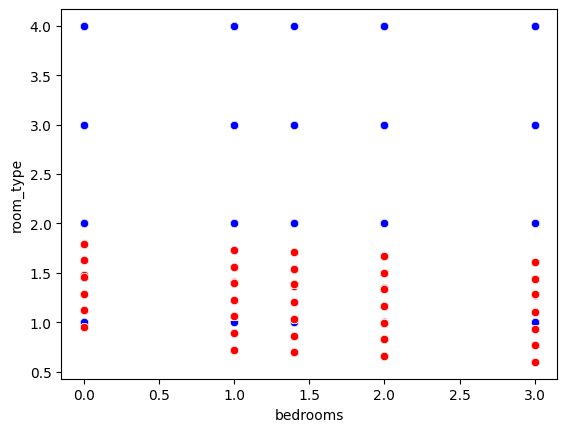

In [73]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='bedrooms', y='room_type', color="blue", data=df1)
sns.scatterplot(x='bedrooms', y='Predicciones5', color="red", data=df1)


**ACCOMMODATES**

<Axes: xlabel='bedrooms', ylabel='accommodates'>

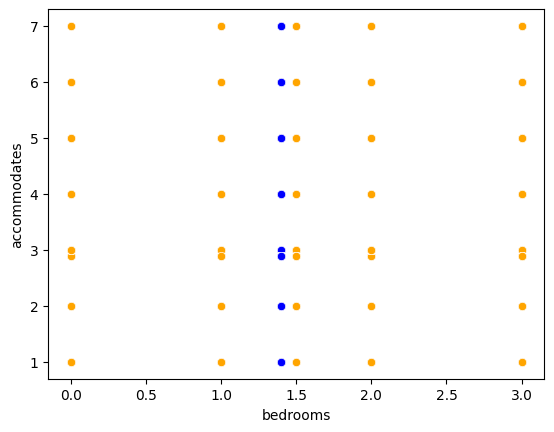

In [74]:
from turtle import color
sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='beds', y='accommodates', color="orange", data=df)

In [75]:

Vars_Indep6= df1[['bedrooms', 'beds']]
Var_Dep6= df1['accommodates']


In [76]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()


In [77]:
type(model6)

sklearn.linear_model._base.LinearRegression

In [78]:
model6.fit(X=Vars_Indep6, y=Var_Dep6)

LinearRegression()

In [79]:
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([1.12189728, 0.72485031]),
 'rank_': 2,
 'singular_': array([134.00727009,  75.41427365]),
 'intercept_': np.float64(0.2816937197864551)}

In [80]:
model6.score(Vars_Indep6,Var_Dep6)

0.5522371583160037

In [81]:
y_pred6= model6.predict(X=df1[['bedrooms', 'beds']])
y_pred6


array([2.12844131, 2.57720022, 3.97518891, ..., 2.12844131, 2.12844131,
       2.12844131], shape=(26582,))

In [82]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones6', y_pred6)
df1


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0.1,Unnamed: 0,host_response_time,host_response_rate,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
0,2.128441,1.564105,2.262205,-0.112870,0.250382,1.378868e+08,0,0,1.0,0.00,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,182
1,2.577200,1.387853,12.849133,0.407211,0.984793,1.378868e+08,1,1,2.0,1.00,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,439
2,3.975189,1.165561,4.187101,0.232627,0.796689,1.378868e+08,2,2,2.0,0.71,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,373
3,2.128441,1.564105,4.187101,0.599791,0.984793,1.378868e+08,3,3,3.0,1.00,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,939
4,2.128441,1.564105,6.111997,0.500798,0.984793,1.378868e+08,4,4,2.0,1.00,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,3.975189,1.165561,7.483767,0.444231,0.984793,3.223868e+08,26577,26577,2.0,1.00,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,488
26578,2.128441,1.564105,16.915758,0.517699,0.899015,3.223895e+08,26578,26578,2.0,1.00,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,701
26579,2.128441,1.564105,16.915758,0.518389,0.899015,3.223933e+08,26579,26579,2.0,1.00,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,703
26580,2.128441,1.564105,16.915758,0.523563,0.899015,3.223981e+08,26580,26580,2.0,1.00,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,718


In [83]:
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6


0.5522371583160037

In [84]:
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6


np.float64(0.7431266098828676)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

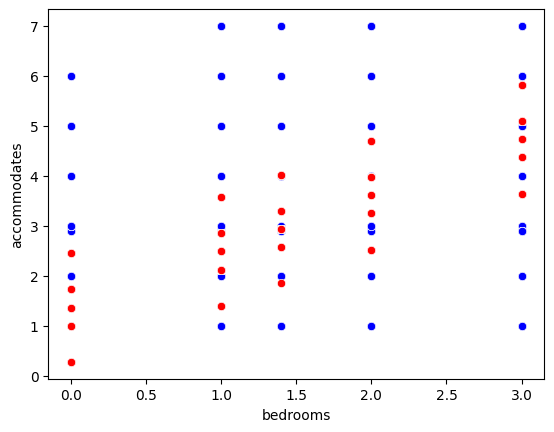

In [85]:
sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bedrooms', y='Predicciones6', color="red", data=df1)


**BEDROOMS**

<Axes: xlabel='accommodates', ylabel='bedrooms'>

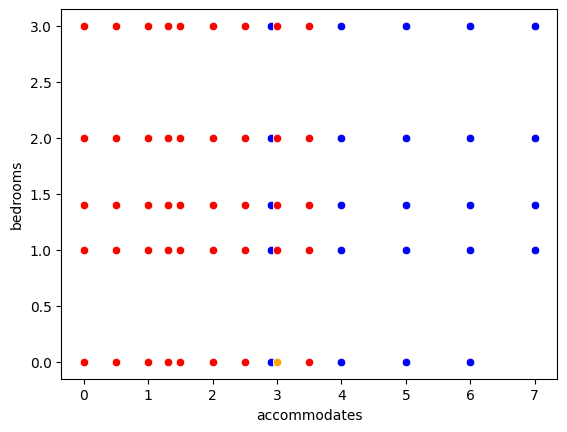

In [86]:
from turtle import color
sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=df1)
sns.scatterplot(x='beds', y='bedrooms', color="orange", data=df1)
sns.scatterplot(x='bathrooms', y='bedrooms', color="red", data=df1)

In [87]:
Vars_Indep7= df1[['accommodates', 'beds','bathrooms']]
Var_Dep7= df1['bedrooms']


In [88]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()


In [89]:
type(model7)

sklearn.linear_model._base.LinearRegression

In [90]:
model7.fit(X=Vars_Indep7, y=Var_Dep7)

LinearRegression()

In [91]:
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.22687257, 0.10645536, 0.30745142]),
 'rank_': 3,
 'singular_': array([248.80204598,  88.15459869,  78.19212685]),
 'intercept_': np.float64(0.17708146968977356)}

In [92]:
model7.score(Vars_Indep7,Var_Dep7)

0.5377607006042244

In [93]:
y_pred7= model7.predict(X=df1[['accommodates', 'beds','bathrooms']])
y_pred7


array([1.04473339, 1.2489187 , 1.60493388, ..., 1.04473339, 1.04473339,
       1.04473339], shape=(26582,))

In [94]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones7', y_pred7)
df1


,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0.1,Unnamed: 0,host_response_time,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
0,1.044733,2.128441,1.564105,2.262205,-0.112870,0.250382,1.378868e+08,0,0,1.0,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,182
1,1.248919,2.577200,1.387853,12.849133,0.407211,0.984793,1.378868e+08,1,1,2.0,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,439
2,1.604934,3.975189,1.165561,4.187101,0.232627,0.796689,1.378868e+08,2,2,2.0,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,373
3,1.044733,2.128441,1.564105,4.187101,0.599791,0.984793,1.378868e+08,3,3,3.0,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,939
4,1.198459,2.128441,1.564105,6.111997,0.500798,0.984793,1.378868e+08,4,4,2.0,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.604934,3.975189,1.165561,7.483767,0.444231,0.984793,3.223868e+08,26577,26577,2.0,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,488
26578,1.044733,2.128441,1.564105,16.915758,0.517699,0.899015,3.223895e+08,26578,26578,2.0,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,701
26579,1.044733,2.128441,1.564105,16.915758,0.518389,0.899015,3.223933e+08,26579,26579,2.0,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,703
26580,1.044733,2.128441,1.564105,16.915758,0.523563,0.899015,3.223981e+08,26580,26580,2.0,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,718


In [95]:
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7


coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7


np.float64(0.7333216897134739)

<Axes: xlabel='bathrooms', ylabel='bedrooms'>

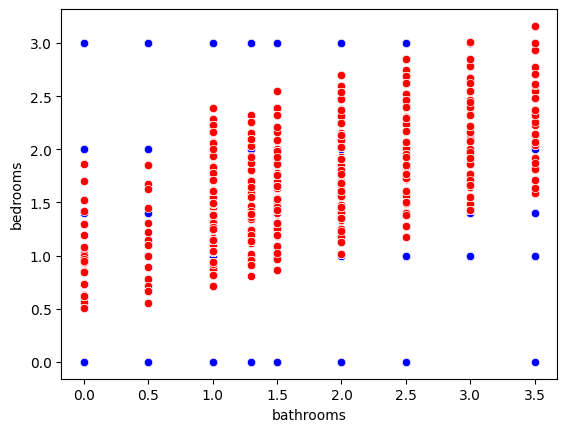

In [96]:
sns.scatterplot(x='bathrooms', y='bedrooms', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y='Predicciones7', color="red", data=df1)



**PRICE**

<Axes: xlabel='room_type', ylabel='price'>

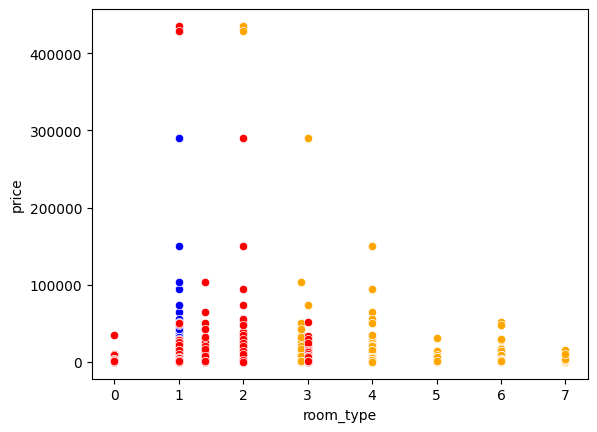

In [97]:
from turtle import color
sns.scatterplot(x='room_type', y='price', color="blue", data=df)
sns.scatterplot(x='accommodates', y='price', color="orange", data=df)
sns.scatterplot(x='bedrooms', y='price', color="red", data=df)

In [98]:
Vars_Indep8= df1[['room_type', 'accommodates','bedrooms']]
Var_Dep8= df1['price']


In [99]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

type(model8)

model8.fit(X=Vars_Indep8, y=Var_Dep8)

model8.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'accommodates', 'bedrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-427.67492567,   75.02214192,  371.3090638 ]),
 'rank_': 3,
 'singular_': array([250.72700534,  82.07436345,  73.16302945]),
 'intercept_': np.float64(1205.1223436220089)}

In [100]:
model8.score(Vars_Indep8,Var_Dep8)

0.010096763014145083

In [101]:
y_pred8= model8.predict(X=df1[['room_type', 'accommodates','bedrooms']])
y_pred8


array([1298.80076559, 1514.84431884, 1820.15411323, ...,  871.12583992,
        871.12583992, 1298.80076559], shape=(26582,))

In [102]:
df1.insert(0, 'Predicciones8', y_pred8)
df1


,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0.1,Unnamed: 0,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
0,1298.800766,1.044733,2.128441,1.564105,2.262205,-0.112870,0.250382,1.378868e+08,0,0,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,182
1,1514.844319,1.248919,2.577200,1.387853,12.849133,0.407211,0.984793,1.378868e+08,1,1,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,439
2,1820.154113,1.604934,3.975189,1.165561,4.187101,0.232627,0.796689,1.378868e+08,2,2,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,373
3,1298.800766,1.044733,2.128441,1.564105,4.187101,0.599791,0.984793,1.378868e+08,3,3,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,939
4,1298.800766,1.198459,2.128441,1.564105,6.111997,0.500798,0.984793,1.378868e+08,4,4,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1392.479188,1.604934,3.975189,1.165561,7.483767,0.444231,0.984793,3.223868e+08,26577,26577,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,488
26578,871.125840,1.044733,2.128441,1.564105,16.915758,0.517699,0.899015,3.223895e+08,26578,26578,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,701
26579,871.125840,1.044733,2.128441,1.564105,16.915758,0.518389,0.899015,3.223933e+08,26579,26579,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,703
26580,871.125840,1.044733,2.128441,1.564105,16.915758,0.523563,0.899015,3.223981e+08,26580,26580,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,718


In [103]:
coef_Deter8=model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter3


coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8


np.float64(0.10048265031409692)

<Axes: xlabel='bedrooms', ylabel='price'>

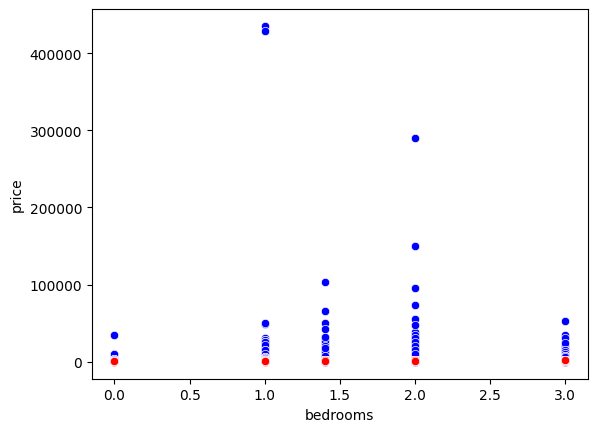

In [104]:
sns.scatterplot(x='bedrooms', y='price', color="blue", data=df1)
sns.scatterplot(x='bedrooms', y='Predicciones8', color="red", data=df1)


**REVIEW_SCORES_RATING**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_rating'>

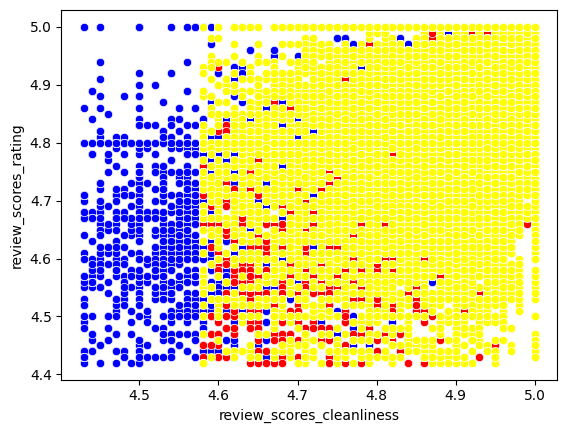

In [105]:
import seaborn as sns

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_rating', color="blue", data=df1)
sns.scatterplot(x='review_scores_communication', y='review_scores_rating', color="red", data=df1)
sns.scatterplot(x='review_scores_location', y='review_scores_rating', color="yellow", data=df1)


In [106]:
Vars_Indep9= df1[['review_scores_communication', 'review_scores_location','review_scores_cleanliness']]
Var_Dep9= df1['review_scores_rating']


In [107]:
from sklearn.linear_model import LinearRegression
model9= LinearRegression()

type(model9)

model9.fit(X=Vars_Indep9, y=Var_Dep9)

model9.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication', 'review_scores_location',
        'review_scores_cleanliness'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.53595499, 0.18873925, 0.36580198]),
 'rank_': 3,
 'singular_': array([23.59191598, 14.75308566, 12.22107022]),
 'intercept_': np.float64(-0.5028548817301077)}

In [108]:
model9.score(Vars_Indep9,Var_Dep9)

y_pred9= model9.predict(X=df1[['review_scores_communication', 'review_scores_location','review_scores_cleanliness']])
y_pred9


array([4.84057661, 4.71820076, 4.81152456, ..., 4.84057661, 4.84057661,
       4.84057661], shape=(26582,))

In [109]:
df1.insert(0, 'Predicciones9', y_pred9)
df1


,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0.1,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
0,4.840577,1298.800766,1.044733,2.128441,1.564105,2.262205,-0.112870,0.250382,1.378868e+08,0,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,182
1,4.718201,1514.844319,1.248919,2.577200,1.387853,12.849133,0.407211,0.984793,1.378868e+08,1,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,439
2,4.811525,1820.154113,1.604934,3.975189,1.165561,4.187101,0.232627,0.796689,1.378868e+08,2,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,373
3,4.916725,1298.800766,1.044733,2.128441,1.564105,4.187101,0.599791,0.984793,1.378868e+08,3,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,939
4,4.787932,1298.800766,1.198459,2.128441,1.564105,6.111997,0.500798,0.984793,1.378868e+08,4,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.840577,1392.479188,1.604934,3.975189,1.165561,7.483767,0.444231,0.984793,3.223868e+08,26577,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,488
26578,4.840577,871.125840,1.044733,2.128441,1.564105,16.915758,0.517699,0.899015,3.223895e+08,26578,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,701
26579,4.840577,871.125840,1.044733,2.128441,1.564105,16.915758,0.518389,0.899015,3.223933e+08,26579,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,703
26580,4.840577,871.125840,1.044733,2.128441,1.564105,16.915758,0.523563,0.899015,3.223981e+08,26580,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,718


In [110]:
coef_Deter9=model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter9


coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9



np.float64(0.6721876246574606)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_rating'>

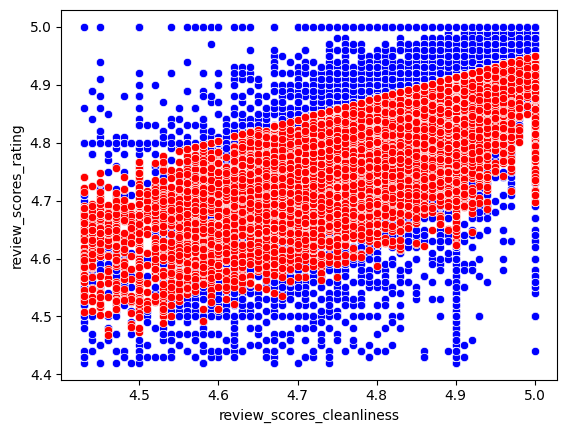

In [111]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_rating', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones9', color="red", data=df1)



<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

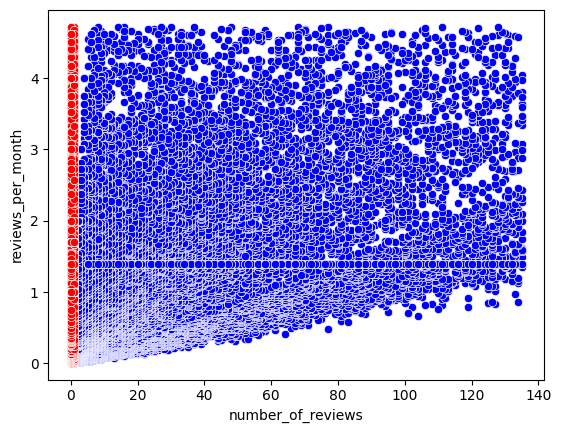

In [112]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y='reviews_per_month', color="red", data=df1)



In [113]:
Vars_Indep10 = df1[['number_of_reviews', 'host_is_superhost']]
Var_Dep10 = df1['reviews_per_month']

from sklearn.linear_model import LinearRegression
model10 = LinearRegression()

type(model10)

model10.fit(X=Vars_Indep10, y=Var_Dep10)

model10.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'host_is_superhost'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.01122761, 0.29280675]),
 'rank_': 2,
 'singular_': array([5114.31621964,   76.06463406]),
 'intercept_': np.float64(1.0196213836200918)}

In [114]:
model10.score(Vars_Indep10, Var_Dep10)

y_pred10 = model10.predict(X=df1[['number_of_reviews', 'host_is_superhost']])
y_pred10

# Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones10', y_pred10)
df1



,Predicciones10,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
0,1.019621,4.840577,1298.800766,1.044733,2.128441,1.564105,2.262205,-0.112870,0.250382,1.378868e+08,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,182
1,2.030995,4.718201,1514.844319,1.248919,2.577200,1.387853,12.849133,0.407211,0.984793,1.378868e+08,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,439
2,1.862581,4.811525,1820.154113,1.604934,3.975189,1.165561,4.187101,0.232627,0.796689,1.378868e+08,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,373
3,2.738335,4.916725,1298.800766,1.044733,2.128441,1.564105,4.187101,0.599791,0.984793,1.378868e+08,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,939
4,1.435932,4.787932,1298.800766,1.198459,2.128441,1.564105,6.111997,0.500798,0.984793,1.378868e+08,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.312428,4.840577,1392.479188,1.604934,3.975189,1.165561,7.483767,0.444231,0.984793,3.223868e+08,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,488
26578,1.019621,4.840577,871.125840,1.044733,2.128441,1.564105,16.915758,0.517699,0.899015,3.223895e+08,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,701
26579,1.019621,4.840577,871.125840,1.044733,2.128441,1.564105,16.915758,0.518389,0.899015,3.223933e+08,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,703
26580,1.019621,4.840577,871.125840,1.044733,2.128441,1.564105,16.915758,0.523563,0.899015,3.223981e+08,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,718


In [115]:
coef_Deter10=model10.score(X=Vars_Indep10, y=Var_Dep10)
coef_Deter10


coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10


np.float64(0.3869123328269166)

<Axes: xlabel='host_is_superhost', ylabel='reviews_per_month'>

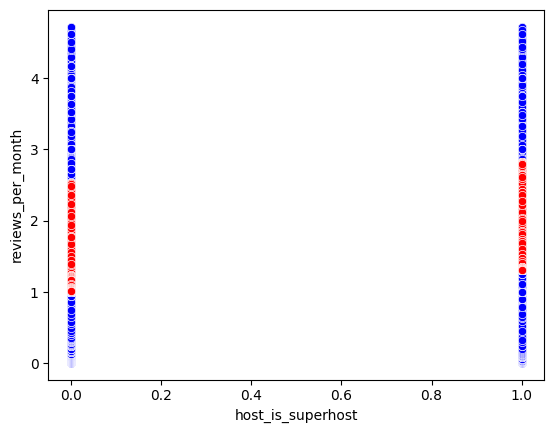

In [116]:
sns.scatterplot(x='host_is_superhost', y='reviews_per_month', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y='Predicciones10', color="red", data=df1)



In [121]:
df1 = df1.drop('scrape_id', axis=1)

In [122]:
Corr_Factors2=df1.corr()
Corr_Factors2

,Predicciones10,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,amenities_size
Predicciones10,1.000000,-0.143502,0.173463,0.148689,0.116069,-0.140269,0.044715,0.439833,0.397802,-0.271024,...,0.059791,0.090477,0.029307,0.944760,-0.012205,-0.137168,-0.083128,-0.115304,0.386912,0.349344
Predicciones9,-0.143502,1.000000,-0.017150,-0.018139,-0.005127,0.024175,-0.111648,-0.050103,-0.063167,0.123491,...,0.089134,-0.101978,-0.081266,-0.210860,0.672188,0.814231,0.828187,0.502125,-0.123247,0.037791
Predicciones8,0.173463,-0.017150,1.000000,0.789801,0.822161,-0.838188,-0.028292,0.245280,0.145034,0.040844,...,0.146213,0.054130,-0.028107,0.146924,0.014855,-0.026718,0.002667,-0.020352,0.153298,0.281952
Predicciones7,0.148689,-0.018139,0.789801,1.000000,0.823842,-0.937970,0.000543,0.257667,0.159906,0.044378,...,0.071269,0.037381,0.041350,0.128293,0.021411,-0.026468,-0.003642,-0.008500,0.139448,0.289368
Predicciones6,0.116069,-0.005127,0.822161,0.823842,1.000000,-0.799095,-0.051449,0.183058,0.102644,0.015397,...,0.104032,0.038298,0.009835,0.097879,0.028874,-0.015307,0.010339,-0.012427,0.097881,0.230349
Predicciones5,-0.140269,0.024175,-0.838188,-0.937970,-0.799095,1.000000,0.007655,-0.222575,-0.129878,-0.041498,...,-0.064200,-0.039250,0.004178,-0.123147,-0.012407,0.029441,0.007379,0.020389,-0.135482,-0.252027
Predicciones4,0.044715,-0.111648,-0.028292,0.000543,-0.051449,0.007655,1.000000,0.222041,0.237278,0.094238,...,-0.165900,0.002940,0.110700,0.042258,-0.139021,-0.083280,-0.115276,-0.013703,0.057879,0.084287
Predicciones3,0.439833,-0.050103,0.245280,0.257667,0.183058,-0.222575,0.222041,1.000000,0.813279,0.101377,...,0.012071,0.033348,0.179271,0.336598,0.047570,-0.065857,-0.013646,-0.033498,0.237893,0.752759
Predicciones2,0.397802,-0.063167,0.145034,0.159906,0.102644,-0.129878,0.237278,0.813279,1.000000,0.155406,...,-0.015071,0.013989,0.231946,0.275116,0.020290,-0.076264,-0.025347,-0.038241,0.212352,0.339666
Predicciones,-0.271024,0.123491,0.040844,0.044378,0.015397,-0.041498,0.094238,0.101377,0.155406,1.000000,...,-0.141647,-0.266957,0.115048,-0.322166,0.084959,0.125716,0.074775,0.069085,0.168402,-0.027976


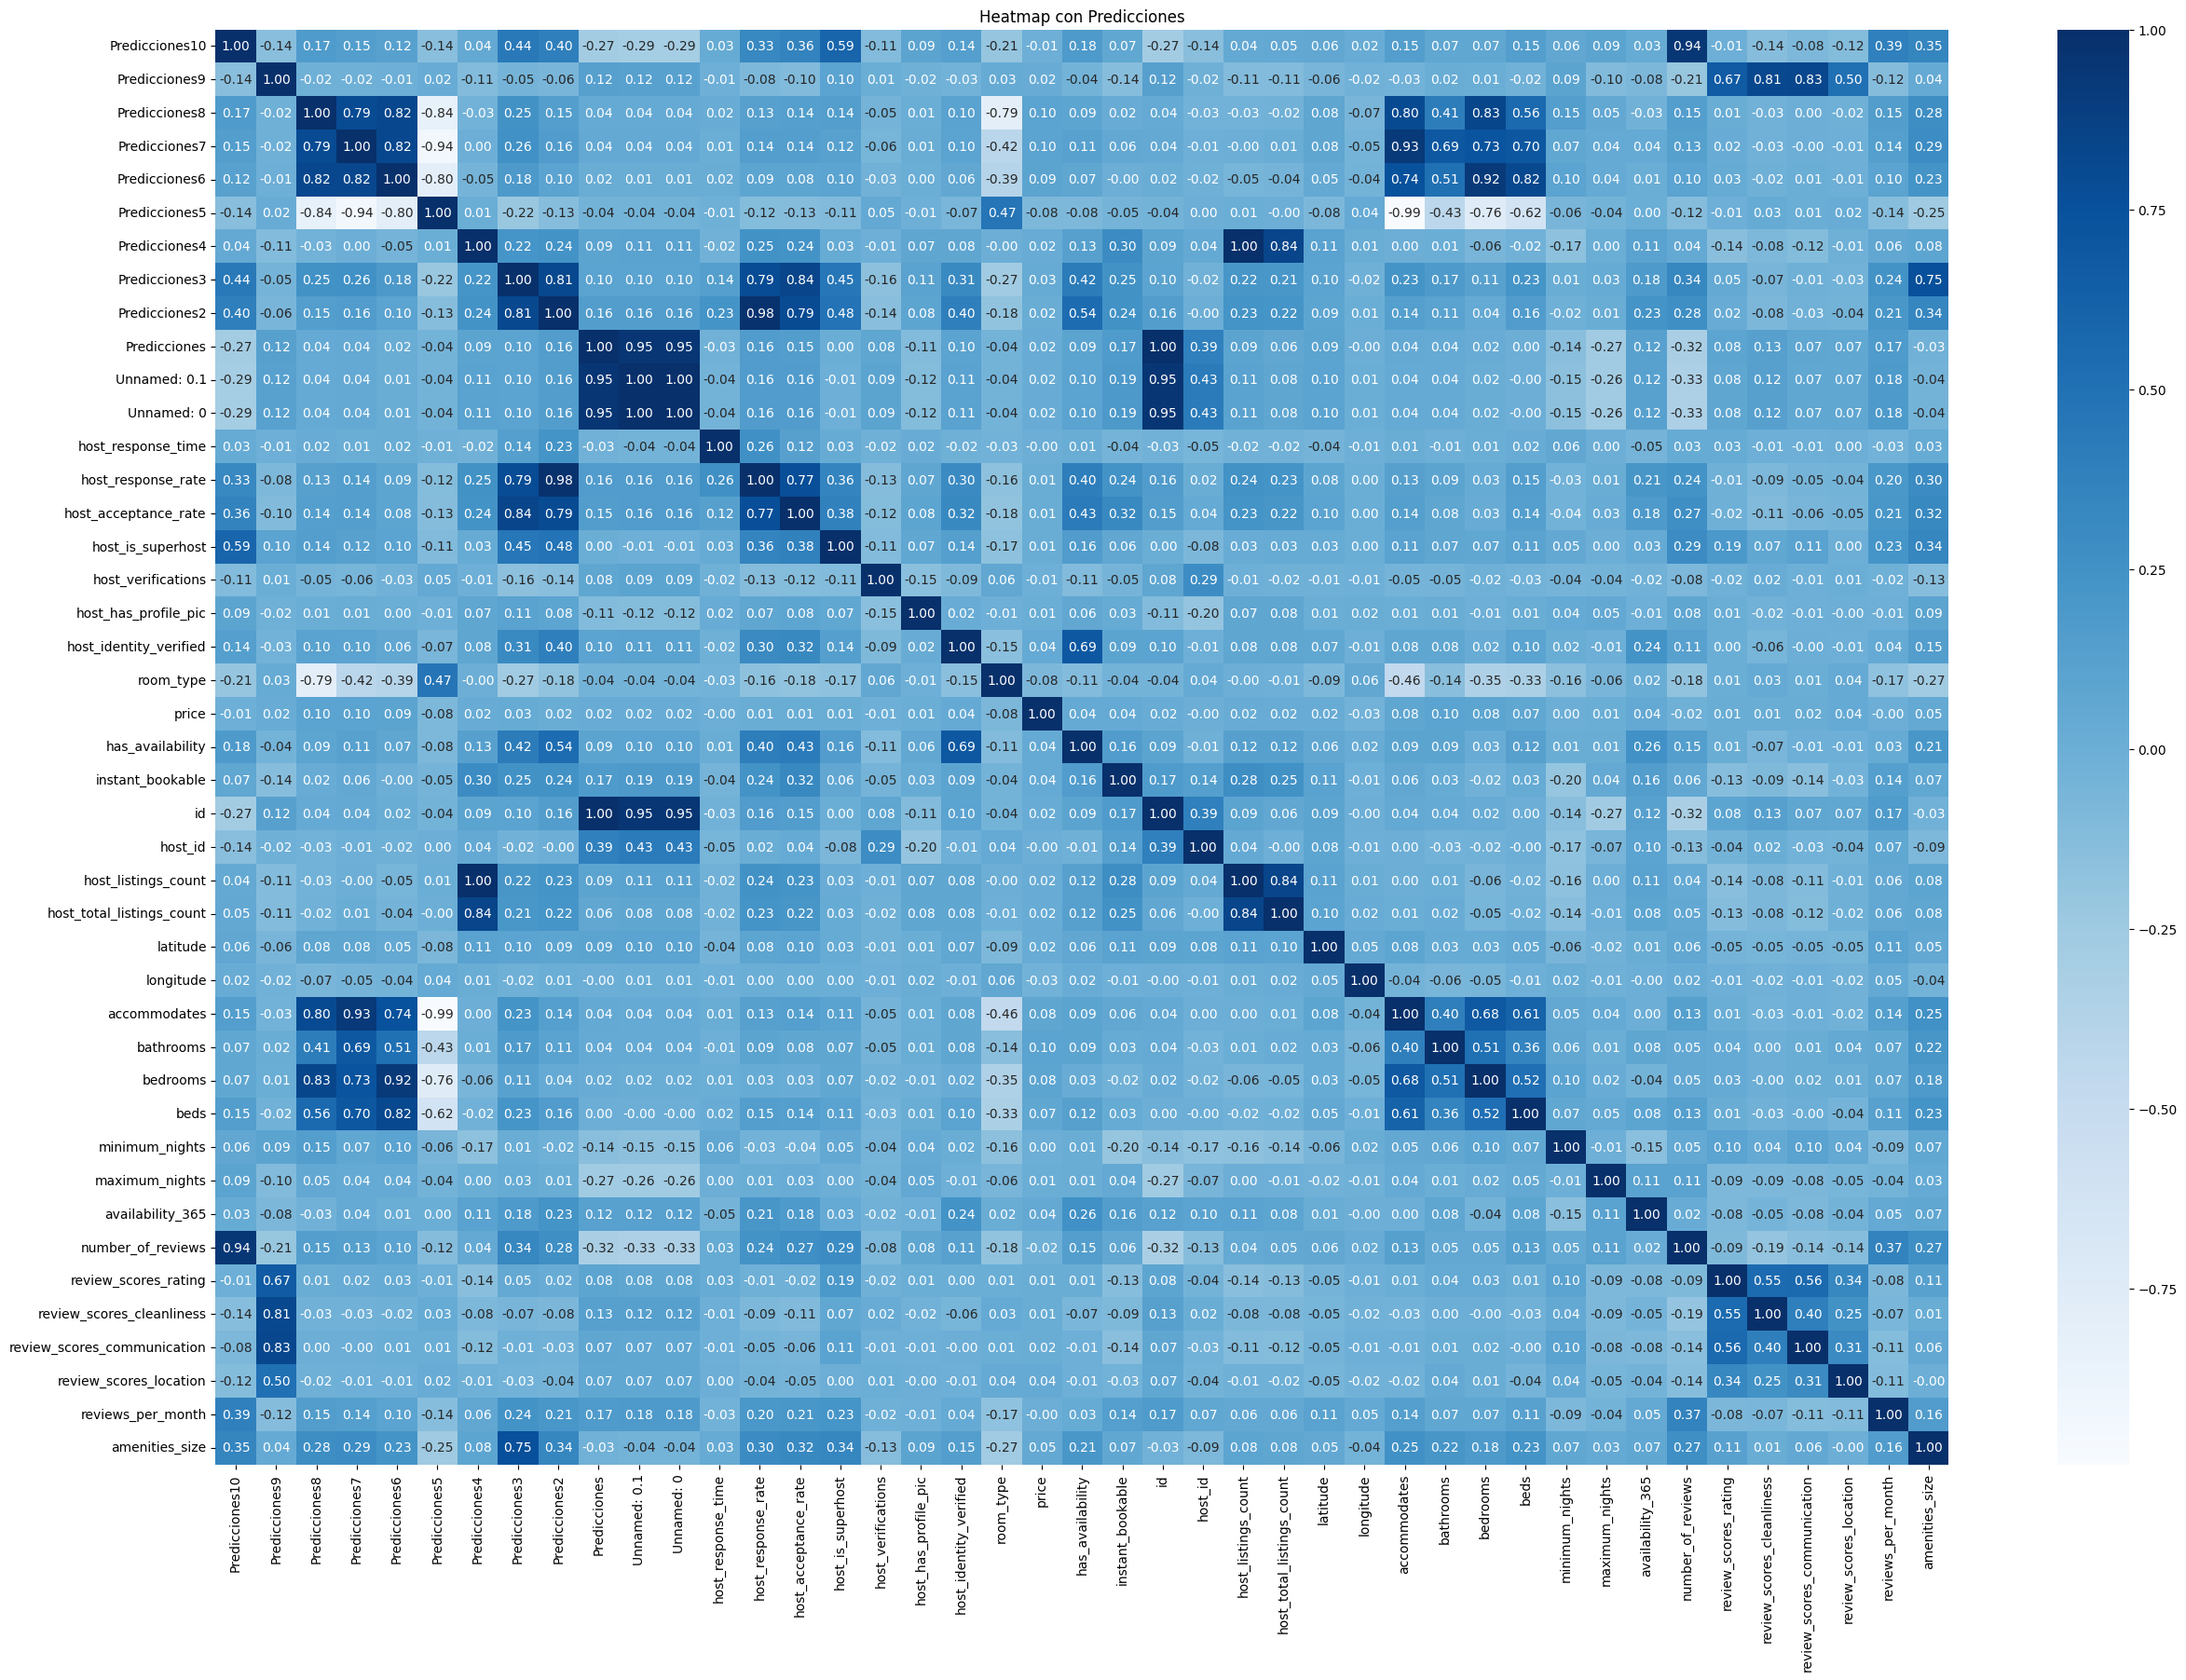

In [125]:
plt.figure(figsize=(30,20))
sns.heatmap(Corr_Factors2, cmap='Blues', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()